# <font style='color:darkorange'>Linear Discriminant Analysis</font>

#### Passi preliminari<br></br>
<font style='color:#0000FF'>
    <ul>° Caricamento</ul> 
    <ul>° Partizionamento</ul>
    <ul>° Standardizzazione dei dati</ul>  
</font>
<b>Espandi sopra per visualizzare ed eseguire</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color Intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]
from sklearn.model_selection import train_test_split
'''Considero le features da 1 a 13 e le associo alla variabile "X", 
le class label le assegno alla variabile "y", cioè la sola colonna 0'''

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

In [2]:
'''STANDARD SCALING: ci permette di standardizzare'''
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

 ### Differenze fra **LDA** e **PCA**

+ La **PCA** ci permette di trovare gli assi ortogonali componenti di massima varianza all'interno del dataset, l' obiettivo dell' **LDA** è quello di trovare il sottospazio delle features che ottimizza la **separabilità** delle classi
+ La **PCA** è un metodo **non supervisionato**, mentre la **LDA** è un metodo **supervisionato**
+ **In linea teorica** la **LDA** è migliore 
+ La PCA tende a **migliorare la classificazione** quando ci troviamo dinnanzi ad un'attività di **riconoscimento delle immagini**: in alcuni casi, per esempio, se ogni classe è composta solo da un piccolo numero di esempi, la **PCA** risulta offrire risultati migliori

### <font style='color:red'>Caratteristiche della LDA</font>

+ Per poter discriminare le due (o più classi - distrib. normale), è utilizzato un **discriminante lineare** 
+ **Assumo** che i dati siano distribuiti secondo una **distribuzione normale** 
+ **Assumo** che le classi abbiano le **stesse matrici di covarianza**
+ **Assumo** che gli esempi di **training** siano *indipendenti*
+ Sebbene il discriminante lineare mostrato sull'asse y (LD 2) acquisisce molta varianza nel set di dati, non sarebbe un buon discriminante lineare poiché non acquisisce alcuna informazione discriminatoria di classe

**N.B.** Tuttavia, qualora uno di questi requisiti non sia garantito, **LDA** funzionerà *ragionevolmente* bene

In [3]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch05/images/05_06.png', width=400)

### <font style='color:darkgreen'>Step dell' LDA</font>

1. Standardizzazione del dataset **d-dimensionale** di input
2. Per ogni classe, computo il **vettore medio d-dimensionale**
3. Costruisco la **matrice di dispersione fra classi** (**between-matrix**),**Sb** e la **matrice di dispersione all'interno della classe** (**within-matrix**), **Sw**
4. Calcolo autovalori e autovettori della matrice **Sw-1Sb**
5. Ordino gli autovalori in ordine decrescente per classificare gli autovettori corrispondenti
6. Scelgo i *k* autovettori che corrispondono ai *k* autovalori più grandi per costruire la matrice di trasformazione **W** che ha dimensioni **d x k**; gli autovettori sono le colonne di questa matrice
7. **Proietto** gli esempi in un nuovo sottospazio delle features usando la matrice di trasformazione **W**

## <font style="color:darkblue"> Linear Discriminant Analysis in scikit-learn

In [18]:
# Lavoro sul TRAINING set, applicando LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

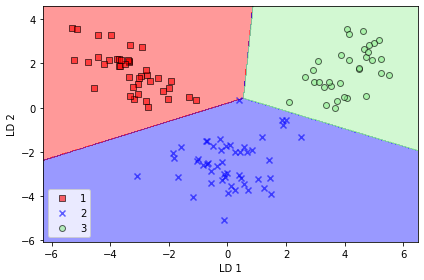

In [17]:
# Utilizzo della Regressione Logistica (LR) 
#come classificatore sul TRAINING 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plot_decision as pd
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
pd.plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

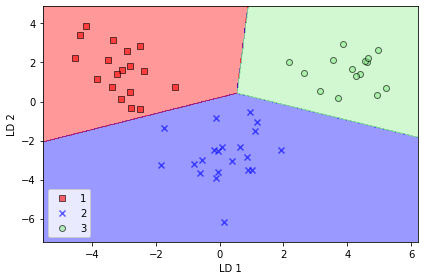

In [20]:
# Adesso vado a fare la stessa cosa sul TEST
# Notiamo che la classificazione è fatta in maniera accurata
# Il livello di accuratezza è elevato
X_test_lda = lda.transform(X_test_std)
pd.plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()